<h2>Restaurant Feasibility Study<h2>

If someone was to open a restaurant in the city, where would they choose to open? Which areas are less saturated with competition relative to the areas population? We will be exploring areas and collecting data on the amount of possible clients versus the amount of competition to decide if any areas stand out as a marginally better location to open a restaurant. 

We will be collecting data on the amount of restaurants in specific boroughs/neighborhoods, and available population data of the corresponding neighborhoods. We will be using various statistical analysis methods to compare neighborhoods to determine which ones have less competition. If we determine that competition alone is not a good variable we will expand our data set to include the average income of an area, as we will assume that people with higher incomes are more likely to have disposable income for eating out. 

In [4]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import urllib.request
from bs4 import BeautifulSoup

#!conda install -c conda-forge geopy --yes 
#from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
#import folium # plotting library

print('Libraries imported.')

Libraries imported.


In [5]:
#passing in foursquare client id
CLIENT_ID = 'ZAZ4UXXHF5LMATCWWBXY1C3TZ5NXOHX3LFISLZFII3HHLPU5'
CLIENT_SECRET = 'YSZNIH25P3COFENOBQEFO53AQQPCDYG1SZE5LRJMGPEW0LBE'
VERSION = '20180604'
LIMIT = 30

In [6]:
# Assign URL.
url = 'https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods'
# Get web page
page = urllib.request.urlopen(url)
# Convert into xml
soup = BeautifulSoup(page, 'lxml')
# Select the appropriate content
tables = soup.find('table', attrs={'class':'wikitable sortable'})

In [7]:
table_rows = tables.find_all('tr')
l = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l.append(row)
df_pop = pd.DataFrame(l, columns=['a','b','c','d','e','f','g','h','i','j','k','l','m'])     

In [8]:
df_pop = df_pop.rename(columns={'a':'Neighborhood', 'd':'Population', 'h':'Average Income'})
df_pop.head()

,Neighborhood,b,c,Population,e,f,g,Average Income,i,j,k,l,m
0,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Toronto CMA Average\n,\n,All\n,"5,113,149\n",5903.63\n,866\n,9.0\n,"40,704\n",10.6\n,11.4\n,\n,\n,\n
2,Agincourt\n,S\n,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...","44,577\n",12.45\n,3580\n,4.6\n,"25,750\n",11.1\n,5.9\n,Cantonese (19.3%)\n,19.3% Cantonese\n,\n
3,Alderwood\n,E\n,"0211.00, 0212.00\n","11,656\n",4.94\n,2360\n,-4.0\n,"35,239\n",8.8\n,8.5\n,Polish (6.2%)\n,06.2% Polish\n,\n
4,Alexandra Park\n,OCoT\n,0039.00\n,"4,355\n",0.32\n,"13,609\n",0.0\n,"19,687\n",13.8\n,28.0\n,Cantonese (17.9%)\n,17.9% Cantonese\n,\n


In [9]:
df_pop.drop(df_pop.columns[[1,2,4,5,6,8,9,10,11,12]],axis=1, inplace=True)

In [10]:
df_pop['Neighborhood'] = df_pop['Neighborhood'].str.strip()
df_pop['Population'] = df_pop['Population'].str.strip()
df_pop['Average Income'] = df_pop['Average Income'].str.strip()
df_pop.head()

,Neighborhood,Population,Average Income
0,None,None,None
1,Toronto CMA Average,"5,113,149","40,704"
2,Agincourt,"44,577","25,750"
3,Alderwood,"11,656","35,239"
4,Alexandra Park,"4,355","19,687"


In [11]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

# Get web page
page = urllib.request.urlopen(url)

# Convert into xml
soup = BeautifulSoup(page, 'lxml')

# Select the appropriate content
tables = soup.find('table', class_='wikitable sortable')

In [12]:
# create a table using HTML tags. Use loop to fill the table.
A=[]
B=[]
C=[]
for row in tables.find_all('tr'):
    cells=row.find_all('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))

In [13]:
# Convert table into a Pandas dataframe and rename columns.
df = pd.DataFrame(A,columns=['Postal Code'])
df['Borough'] = B
df['Neighborhood'] = C

In [14]:
# Clean the data, remove unnassigned postal codes.
df=df[df.Borough != 'Not assigned\n']
df.head()

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [15]:
LL = pd.read_csv("http://cocl.us/Geospatial_data")

In [16]:
# Clean the data
df['Postal Code'] = df['Postal Code'].str.strip()
LL['Postal Code'] = LL['Postal Code'].str.strip()
df['Borough'] = df['Borough'].str.strip()
df['Neighborhood'] = df['Neighborhood'].str.strip()

In [17]:
# Merge the two dataframes so we have a complete set to work with.
data = df.merge(LL, on="Postal Code")
data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [19]:
# Select only Toronto neighborhoods.
data_T = data[data['Borough'].str.contains('Toronto')]
data_T

,Postal Code,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


In [20]:
# Make things a bit clearer by sorting the data
dataT_sorted = data_T.sort_values('Borough')
dataT_sorted.count()

Postal Code     39
Borough         39
Neighborhood    39
Latitude        39
Longitude       39
dtype: int64

In [21]:
project_data = df_pop.merge(dataT_sorted, on="Neighborhood")
project_data

,Neighborhood,Population,Average Income,Postal Code,Borough,Latitude,Longitude
0,Church and Wellesley,"13,397","37,653",M4Y,Downtown Toronto,43.665860,-79.383160
1,Davisville,"23,727","55,735",M4S,Central Toronto,43.704324,-79.388790
2,Lawrence Park,"6,653","214,110",M4N,Central Toronto,43.728020,-79.388790
3,Rosedale,"7,672","213,941",M4W,Downtown Toronto,43.679563,-79.377529
4,St. James Town,"14,666","22,341",M5C,Downtown Toronto,43.651494,-79.375418
5,The Beaches,"20,416","67,536",M4E,East Toronto,43.676357,-79.293031


As we can see we are working with an incomplete data block (missing 88%). Many neighborhoods have been omitted in the final dataframe. As this is a course project using outdated data and not an actual business project we will work with the neighborhoods that we have complete data on to demonstrate fundamental skills. 

In [22]:
search = 'burger'
radius = 1000
LIMIT = 50


The 50 call limit completely dismantles my idea of comparing anything to the total amount of restaurants in the area. Project being modified to compare burger joints.

In [23]:
d= []
for x in range (6):
    latitude = project_data.loc[x,'Latitude']
    longitude = project_data.loc[x,'Longitude']
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    dataframe = json_normalize(venues)
    #count = dataframe['id'].count()
    d.append(dataframe)

In [24]:
c=[]
for i in range (6):
    cnt = d[i]['name'].count()
    c.append(cnt)
c = pd.DataFrame(c)
c.rename(columns = {0: '# of Burger Restaurants'}, inplace = True)
c
    

,# of Burger Restaurants
0,16
1,3
2,1
3,1
4,31
5,4


In [25]:
project_data = project_data.merge(c, how='outer', left_index=True, right_index=True)
project_data.rename(columns = {'0': '# of Burger Restaurants'}, inplace = True)
project_data


,Neighborhood,Population,Average Income,Postal Code,Borough,Latitude,Longitude,# of Burger Restaurants
0,Church and Wellesley,"13,397","37,653",M4Y,Downtown Toronto,43.665860,-79.383160,16
1,Davisville,"23,727","55,735",M4S,Central Toronto,43.704324,-79.388790,3
2,Lawrence Park,"6,653","214,110",M4N,Central Toronto,43.728020,-79.388790,1
3,Rosedale,"7,672","213,941",M4W,Downtown Toronto,43.679563,-79.377529,1
4,St. James Town,"14,666","22,341",M5C,Downtown Toronto,43.651494,-79.375418,31
5,The Beaches,"20,416","67,536",M4E,East Toronto,43.676357,-79.293031,4


In [26]:
! pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [27]:
project_data.dtypes

Neighborhood                object
Population                  object
Average Income              object
Postal Code                 object
Borough                     object
Latitude                   float64
Longitude                  float64
# of Burger Restaurants      int64
dtype: object

In [28]:
project_data['Population'] = project_data['Population'].str.replace('[^\w\s]','')
project_data['Average Income'] = project_data['Average Income'].str.replace('[^\w\s]','')
project_data


,Neighborhood,Population,Average Income,Postal Code,Borough,Latitude,Longitude,# of Burger Restaurants
0,Church and Wellesley,13397,37653,M4Y,Downtown Toronto,43.665860,-79.383160,16
1,Davisville,23727,55735,M4S,Central Toronto,43.704324,-79.388790,3
2,Lawrence Park,6653,214110,M4N,Central Toronto,43.728020,-79.388790,1
3,Rosedale,7672,213941,M4W,Downtown Toronto,43.679563,-79.377529,1
4,St. James Town,14666,22341,M5C,Downtown Toronto,43.651494,-79.375418,31
5,The Beaches,20416,67536,M4E,East Toronto,43.676357,-79.293031,4


In [29]:
project_data[['Population']] = project_data[['Population']].astype('int')
project_data[['Average Income']] = project_data[['Average Income']].astype('float')
project_data.dtypes

Neighborhood                object
Population                   int64
Average Income             float64
Postal Code                 object
Borough                     object
Latitude                   float64
Longitude                  float64
# of Burger Restaurants      int64
dtype: object

In [30]:
project_data.corr()

,Population,Average Income,Latitude,Longitude,# of Burger Restaurants
Population,1.000000,-0.741842,-0.168935,0.394849,0.070151
Average Income,-0.741842,1.000000,0.617115,-0.211328,-0.669147
Latitude,-0.168935,0.617115,1.000000,-0.264426,-0.749405
Longitude,0.394849,-0.211328,-0.264426,1.000000,-0.124651
# of Burger Restaurants,0.070151,-0.669147,-0.749405,-0.124651,1.000000


(0, 42.54864124192362)

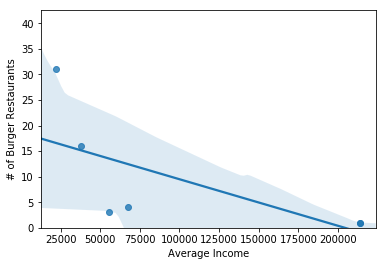

In [47]:
sns.regplot(x='Average Income', y="# of Burger Restaurants", data=project_data)
plt.ylim(0,)

(0, 71.78217461805544)

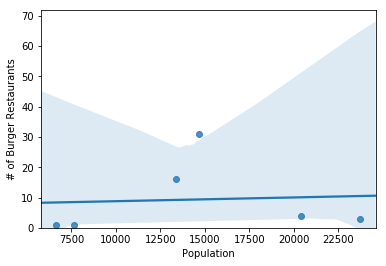

In [50]:
sns.regplot(x='Population', y="# of Burger Restaurants", data=project_data)
plt.ylim(0,)

In [51]:
project_data.describe()

,Population,Average Income,Latitude,Longitude,# of Burger Restaurants
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,14421.833333,101886.000000,43.684270,-79.367786,9.333333
std,6775.560240,88219.807091,0.027620,0.037041,12.011106
min,6653.000000,22341.000000,43.651494,-79.388790,1.000000
25%,9103.250000,42173.500000,43.668484,-79.387383,1.500000
50%,14031.500000,61635.500000,43.677960,-79.380345,3.500000
75%,18978.500000,177339.750000,43.698134,-79.375946,13.000000
max,23727.000000,214110.000000,43.728020,-79.293031,31.000000


In [53]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
x = project_data[['Average Income']]
y = project_data[['# of Burger Restaurants']]

In [55]:
lm.fit(x,y)
Yhat=lm.predict(x)
Yhat[0:6]

array([[15.18522621],
       [13.53788097],
       [-0.89073881],
       [-0.87534221],
       [16.58021296],
       [12.46276089]])

In [57]:
lm.intercept_

array([18.61557078])

In [58]:
lm.coef_

array([[-9.11041501e-05]])

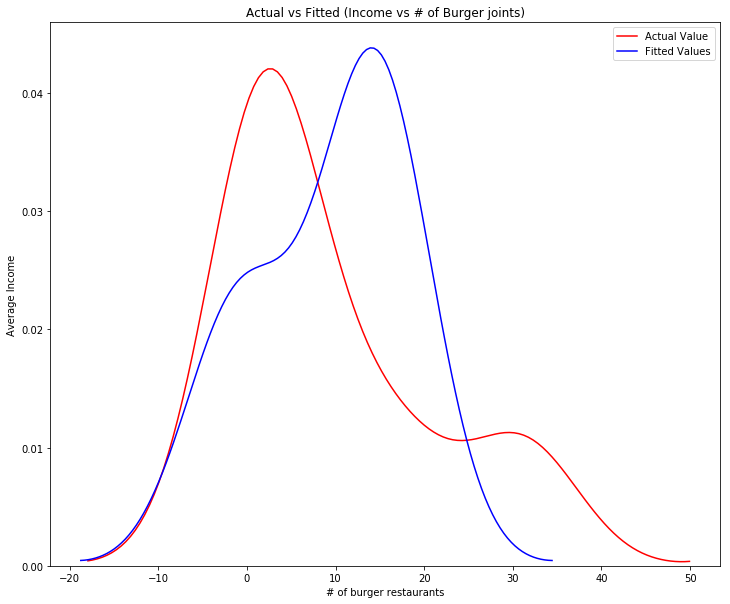

In [66]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(project_data['# of Burger Restaurants'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted (Income vs # of Burger joints)')
plt.xlabel('# of burger restaurants')
plt.ylabel('Average Income')

plt.show()
plt.close()